<a href="https://colab.research.google.com/github/anhhahuynh/AI-Final/blob/main/traffic_sign_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/AI/'

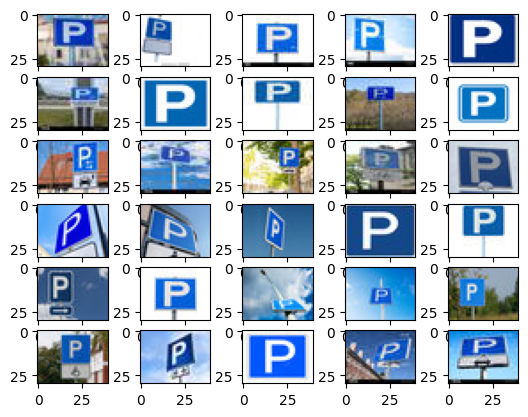

In [ ]:
for i in range(30):
  plt.subplot(6,5,i+1)
  filename = folder + 'biendoxe ('+str(i)+').jpg'
  img = plt.imread(filename)
  plt.imshow(img)

In [ ]:
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/AI/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('bienbaocoi '):
    output = 1
  if file.startswith('biendoxe '):
    output = 2
  if file.startswith('biendung '):
    output = 3
  if file.startswith('bienquayxe '):
    output = 4
  if file.startswith('camdoxe '):
    output = 5
  if file.startswith('camnguoidibo '):
    output = 6
  if file.startswith('duongmotchieu '):
    output = 7
  if file.startswith('duonguutien '):
    output = 8
  if file.startswith('lamduong '):
    output = 9
  if file.startswith('nguocchieu '):
    output = 10
  img =load_img(folder+file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('trafficsign_photos.npy',photos)
save('trafficsign_labels.npy',labels)

(300, 30, 40, 3) (300,)


In [ ]:
import numpy as np
x_train = np.load('/content/trafficsign_photos.npy')
y_train = np.load('/content/trafficsign_labels.npy')

print(x_train.shape)
print(y_train.shape)

(300, 30, 40, 3)
(300,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,11)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
#model.add(Dropout(0.25))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(11,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=5,epochs = 30,verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 15, 20, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                             
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 10, 64)        

1/1 [==============================] - 0s 99ms/step


'Stop'

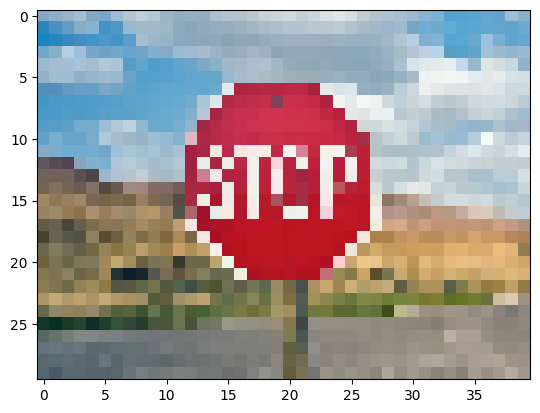

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'Horns prohibited',2:'Parking',3:'Stop', 4:'Roundabout', 5:'No parking', 
       6:'No pedestrians', 7:'Proceed straight ahead only', 8:'Priority road',9:'Construction ahead', 10:'No entry'}
img = load_img("/content/drive/MyDrive/testsign.png",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 48ms/step


'Construction ahead'

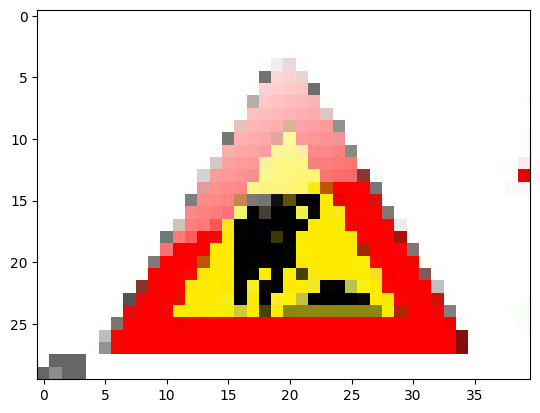

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'Horns prohibited',2:'Parking',3:'Stop', 4:'Roundabout', 5:'No parking', 
       6:'No pedestrians', 7:'Proceed straight ahead only', 8:'Priority road',9:'Construction ahead', 10:'No entry'}
img = load_img("/content/drive/MyDrive/testsign3.png",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 23ms/step


'Horns prohibited'

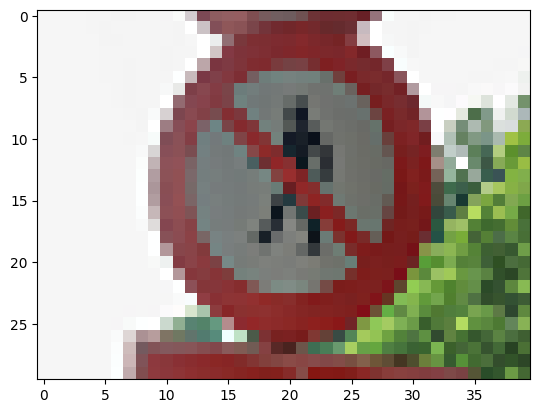

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'Horns prohibited',2:'Parking',3:'Stop', 4:'Roundabout', 5:'No parking', 
       6:'No pedestrians', 7:'Proceed straight ahead only', 8:'Priority road',9:'Construction ahead', 10:'No entry'}
img = load_img("/content/drive/MyDrive/testsign4.png",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

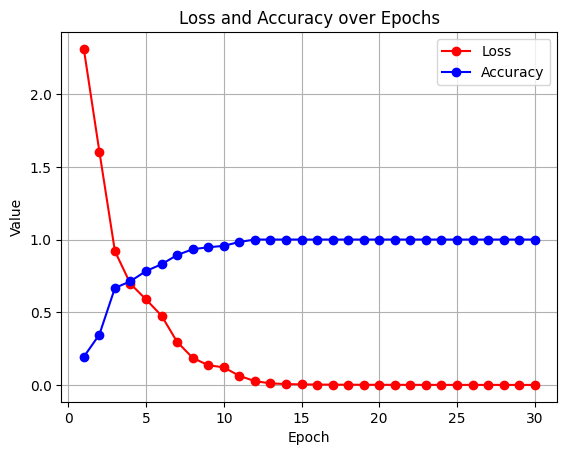

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu epoch, loss và accuracy
epochs = range(1, 31)
loss = [2.3107, 1.6051, 0.9197, 0.6953, 0.5882, 0.4761, 0.2962, 0.1865, 0.1358, 0.1212,
        0.0628, 0.0264, 0.0111, 0.0062, 0.0038, 0.0027, 0.0020, 0.0015, 0.0013, 9.7811e-04,
        8.3552e-04, 7.3426e-04, 6.2586e-04, 5.4429e-04, 4.8767e-04, 4.3913e-04, 3.7756e-04,
        3.4269e-04, 3.1135e-04, 2.7924e-04]
accuracy = [0.1933, 0.3467, 0.6667, 0.7133, 0.7833, 0.83, 0.8933, 0.9333, 0.9467, 0.9567,
            0.9833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
            1.0, 1.0, 1.0, 1.0, 1.0]

# Vẽ đồ thị
plt.plot(epochs, loss, 'r-o', label='Loss')
plt.plot(epochs, accuracy, 'b-o', label='Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and Accuracy over Epochs')
plt.grid(True)
plt.legend()

# Hiển thị đồ thị
plt.show()



In [ ]:
from keras.models import load_model
model.save('trafficsign.h5' )